In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes",
    "DataFrames",
    "BioSymbols",
    "LinearAlgebra"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))


18-element Vector{SubString{String}}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 69 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 71 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 70 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 77 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 72 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 78 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ "na.normaliz

In [5]:
# short_read_set = short_read_sets[1]
# short_read_set = short_read_sets[2]
short_read_set = short_read_sets[3]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x"

In [6]:
forward = short_read_set * ".1_val_1.fq.gz"
reverse = short_read_set * ".2_val_2.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz"

In [7]:
short_read_set_joint_fastq = short_read_set * ".joint.fq.gz"
if !isfile(short_read_set_joint_fastq)
    run(pipeline(`cat $(forward) $(reverse)`, short_read_set_joint_fastq))
end
short_read_set_joint_fastq
original_fastq = short_read_set_joint_fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.fq.gz"

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 155], [0, 1, 7, 30, 32], false)
  4.793086 seconds (1.46 M allocations: 92.621 MiB, 0.71% gc time, 99.99% compilation time)
(k, predicted_saturation) = (3, 1.0)


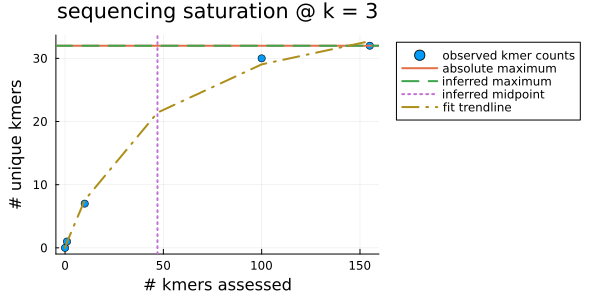

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 5369], [0, 1, 10, 85, 428, 512], false)
  0.000095 seconds (285 allocations: 26.812 KiB)
(k, predicted_saturation) = (5, 1.0)


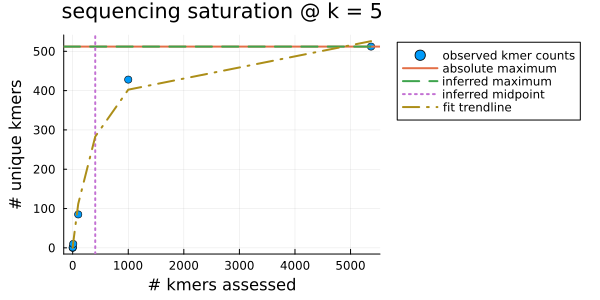

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 94750], [0, 1, 10, 99, 834, 4538, 6063], true)
  0.000082 seconds (285 allocations: 26.844 KiB)
(k, predicted_saturation) = (7, 0.7401123046875)


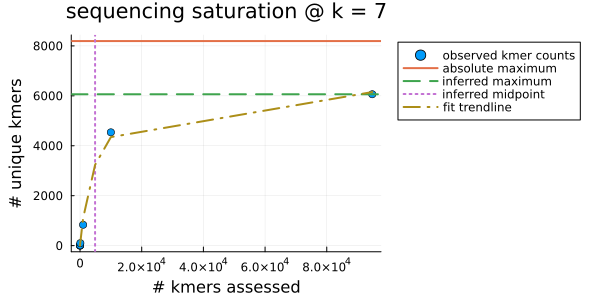

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 92110], [0, 1, 10, 100, 877, 6670, 11695], true)
  0.000075 seconds (225 allocations: 21.125 KiB)
(k, predicted_saturation) = (11, 0.005576610565185547)


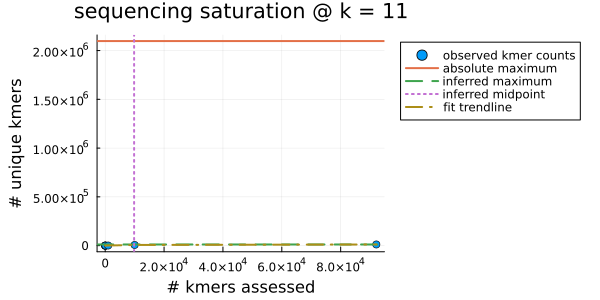

[ Info: polishing with k = 11
Progress: 100%|█████████████████████████████████████████| Time: 0:06:42
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.fq.gz", k = 23)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycel

In [8]:
# almost no time at all for short reads
polishing_results = Mycelia.iterative_polishing(original_fastq)

In [9]:
assembly_fastq = last(polishing_results).fastq
# assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

In [10]:
# assembly_k = last(polishing_results).k
assembly_k = 89

89

In [11]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

145.70757575757577

In [12]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{16879, 16776} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [13]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 0


({16879, 16776} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  16870, 16871, 16872, 16873, 16874, 16875, 16876, 16877, 16878, 16879])

In [14]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

103-element Vector{Vector{Int64}}:
 [140, 146, 224, 275, 288, 299, 328, 329, 403, 456  …  16771, 16797, 16817, 16842, 16843, 16857, 16867, 16868, 16875, 16876]
 [5, 18, 29, 30, 56, 111, 112, 142, 163, 191  …  16640, 16647, 16649, 16673, 16679, 16686, 16809, 16810, 16829, 16834]
 [16, 43, 84, 88, 173, 334, 353, 393, 473, 539  …  16476, 16497, 16567, 16579, 16623, 16629, 16665, 16692, 16763, 16766]
 [90, 91, 125, 223, 242, 364, 365, 371, 412, 455  …  16515, 16646, 16667, 16754, 16791, 16798, 16828, 16832, 16858, 16873]
 [52, 101, 176, 177, 215, 293, 304, 347, 408, 451  …  16621, 16642, 16643, 16644, 16700, 16705, 16706, 16778, 16826, 16827]
 [23, 31, 36, 39, 71, 81, 98, 114, 127, 150  …  16402, 16491, 16534, 16607, 16614, 16653, 16675, 16759, 16773, 16836]
 [2, 11, 28, 60, 107, 209, 220, 244, 245, 246  …  16378, 16392, 16423, 16434, 16472, 16606, 16635, 16684, 16752, 16769]
 [34, 62, 63, 135, 254, 257, 314, 404, 453, 499  …  16550, 16580, 16634, 16639, 16685, 16716, 16726, 16807, 16813, 

In [15]:
length.(connected_components)

103-element Vector{Int64}:
 540
 534
 488
 472
 462
 448
 443
 420
 420
 369
 365
 326
 326
   ⋮
  60
  59
  59
  57
  57
  56
  49
  36
  31
  25
  22
   6

In [16]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences
length.(connected_component_sequences)

103-element Vector{Int64}:
 573
 622
 576
 552
 489
 525
 310
 508
 508
 457
 401
 414
 414
   ⋮
 148
 147
 147
 145
 145
 144
 137
 124
 119
 113
 110
  94

In [ ]:
# first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))
# second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))
# intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

In [17]:
assembled_contig_quality_table = DataFrames.DataFrame()
for (i, connected_component_sequence) in enumerate(connected_component_sequences)
    this_table = Mycelia.assess_assembly_quality(assembled_sequence=connected_component_sequence, fastq=original_fastq)
    this_table[!, "contig"] .= "$(i)"
    this_table[!, "contig_length"] .= length(connected_component_sequence)
    append!(assembled_contig_quality_table, this_table)
end
assembled_contig_quality_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 

Row,k,cosine_distance,js_divergence,qv,contig,contig_length
,Int64,Float64,Float64,Float64,String,Int64
1,11,0.0,0.0,17.0409,1,573
2,13,0.0,0.0,28.1755,1,573
3,17,0.0,0.0,Inf,1,573
4,19,0.0,0.0,22.4509,1,573
5,23,1.11022e-16,0.0,Inf,1,573
6,31,0.0,0.0,Inf,1,573
7,53,1.11022e-16,0.0,25.5903,1,573
8,11,0.0,0.0,21.5007,2,622
9,13,0.0,0.0,31.9865,2,622


In [114]:
function find_canonical_kmer_overlaps(sequences, k)
    sequence_canonical_kmers = keys.(Mycelia.count_canonical_kmers.(Kmers.DNAKmer{k}, sequences))
    canonical_kmer_intersect_sizes = zeros(length(sequence_canonical_kmers), length(sequence_canonical_kmers))
    for (a, aset) in enumerate(sequence_canonical_kmers)
        for (b, bset) in enumerate(sequence_canonical_kmers)
            canonical_kmer_intersect_sizes[a, b] = length(intersect(aset, bset))
        end
    end
    canonical_kmer_intersect_sizes
end

function find_best_kmer_intersect(canonical_kmer_intersect_sizes)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(canonical_kmer_intersect_sizes))
    max_off_diagonal_score = maximum(canonical_kmer_intersect_sizes[off_diagonal_mask])
    @assert max_off_diagonal_score > 0
    return findfirst(canonical_kmer_intersect_sizes .== max_off_diagonal_score)
end

function dna_pair_align(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    BioAlignments.pairalign(BioAlignments.OverlapAlignment(), seq1, seq2, scoremodel)
end

function find_best_alignment(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    forward_alignment = dna_pair_align(seq1, seq2, scoremodel)
    reverse_complement_alignment = dna_pair_align(seq1, BioSequences.reverse_complement(seq2), scoremodel)
    if BioAlignments.score(forward_alignment) > BioAlignments.score(reverse_complement_alignment)
        best_alignment = forward_alignment
    else
        best_alignment = reverse_complement_alignment
    end
    return best_alignment
end

function pairwise_align_sequences(sequences)
    best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
    ProgressMeter.@showprogress for (a, a_seq) in enumerate(sequences)
        for (b, b_seq) in enumerate(sequences)
            best_pairwise_alignments[a, b] = find_best_alignment(a_seq, b_seq)
        end
    end
    best_pairwise_alignments
end

function find_best_alignment(best_pairwise_alignments)
    alignment_scores = BioAlignments.score.(best_pairwise_alignments)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(best_pairwise_alignments))
    max_off_diagonal_score = maximum(alignment_scores[off_diagonal_mask])
    return findfirst(alignment_scores .== max_off_diagonal_score)
end

"""
pass in alignment_result.aln or BioAlignments.alignment(alignment_result)
"""
function consensus_sequence(alignment)
    consensus_symbols = BioSymbols.DNA[]
    for alignment_tuple in collect(alignment)
        push!(consensus_symbols, rand(filter(x -> x != BioSymbols.DNA_Gap, alignment_tuple)))
    end
    consensus_seq = BioSequences.LongDNA{2}(consensus_symbols)
    return consensus_seq
end

consensus_sequence

In [19]:
assembly_sequences = deepcopy(connected_component_sequences)
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 2000
  seq:   0 -GAATGCCTGCGTGCTTACGCCTTAGTGTCATCTCACAATACGCAGAAAGGAAGTCCGAT  59
            |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 AGAATGCCTGCGTGCTTACGCCTTAGTGTCATCTCACAATACGCAGAAAGGAAGTCCGAT  60

  seq:  60 GGTTTGCCACGGCCAAGGCTACTGATCAATTTACCACTGGCTCATTCTTGATCGTGACCA 119
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GGTTTGCCACGGCCAAGGCTACTGATCAATTTACCACTGGCTCATTCTTGATCGTGACCA 120

  seq: 120 AATGCACTCCCACGCTAGCTGTATCACTAAACAGGACTTGAGTAACAAGAGCGTCCACTT 179
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 AATGCACTCCCACGCTAGCTGTATCACTAAACAGGACTTGAGTAACAAGAGCGTCCACTT 180

  seq: 180 CGCGCGTTTTTGTGAATCTCCGAGTCGTGTCGCACTGTATCCGAAGAAACAGAAAATGGG 239
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [20]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1930
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATTTGTAGAAAACTCACGATGGCTAGTGTGAAGGCATGGGGTGAAGATGTTATCAAGGGC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CTATAATGTTACTGCTAGGTGTTTTATCGGGTGGTTGTCAGACAGTAGGGAGTGGTGGAA 120

  seq:   0 -------------------------------------------CTATTGGAGAAACATAT  17
                                                      |||||||||||||||||
  ref: 121 AAAATGCTTTACTATCTTTATTCACGGAATTGTGATGCTTACGCTATTGGAGAAACATAT 180

  seq:  18 TAATCGCCATACGCCACGGTCATTGCTGTTGCAACGGTGTGGGTATAACTCAGTAACATA  77
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [21]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1795
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AGTTATACCCACACCGTTGCAACAGCAATGACCGTGGCGTATGGCGATTAATATGTTTCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CCAATAGCGTAAGCATCACAATTCCGTGAATAAAGATAGTAAAGCATTTTTTCCACCACT 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CCCTACTGTCTGACAACCACCCGATAAAACACCTAGCAGTAACATTATAGGCCCTTGATA 180

  seq:   0 -------CACCCCATGCCTTCACACTAGCCATCGTGAGTTTTCTACAAATTACTGGTGCT  53
                  |||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [22]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1515
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AATTAATAGACTGGTAAGGATCGGCCTGGCGAGCGCCCTTTCAGTCCGTTGCTGGGACAC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TAGTGCCCGTCGGGCTGACTCTTGTCGGATTCTCCCAAAAAGGTGAATATAAGGTGCGGT 120

  seq:   0 ----------AATCGAGTCAAGGAACTAAAATGAATTTCTAAAAGGGCTCGTGGCTAATA  50
                     ||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GTGCATACTCAATCGAGTCAAGGAACTAAAATGAATTTCTAAAAGGGCTCGTGGCTAATA 180

  seq:  51 AGTTTACGGTTTGTGAGTCTGGCGGCCTGCACAGGAGATCTGTACAGGCACTTAGTAAGA 110
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [23]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1420
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GGCGATATCGCTTAGCGCCCTCCGCAATCAATTACACTGAGATGCTAGGGGATTTTATGC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TACAAATACGCGGTGGGATTTGTATCTTGAGTTCAGCATCGAATGGTCCCGAGGCCCGCC 120

  seq:   0 ----------------------------------------TTTCTACATTCAGAAGCTTG  20
                                                   ||||||||||||||||||||
  ref: 121 AGGTGTTAGCTAAGTAAGAGCCAAATAGGCCCGAACAGCGTTTCTACATTCAGAAGCTTG 180

  seq:  21 CCCTGGTCTCCAGGAACTCAACATGTCACTTCCGTATGCATGCTCGGCAAAGTGACCAAC  80
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [24]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1300
  seq:   0 ----------------ATAGGATTGCTCAAGAGTCGCAAGCTATATTACGCTCAAGGCAC  44
                           ||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 CAGAGGACCGCCTCAGATAGGATTGCTCAAGAGTCGCAAGCTATATTACGCTCAAGGCAC  60

  seq:  45 ACACCCTGAGTAAAAAGCGTCTCCTATTACATACCACCAATCGGCATACGGTCGACGGAC 104
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ACACCCTGAGTAAAAAGCGTCTCCTATTACATACCACCAATCGGCATACGGTCGACGGAC 120

  seq: 105 GTAACACAGGACCCCAAGAAATGGATTCAAGGGGGGGTGGGCCTAACACATTGTTTCGTG 164
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GTAACACAGGACCCCAAGAAATGGATTCAAGGGGGGGTGGGCCTAACACATTGTTTCGTG 180

  seq: 165 CCCAATAGGAAGAACACCCACACATAAGGAAGCCTGAGTACCCAAGATCCGATGTATATG 224
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [25]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1290
  seq:   1 GACCGTTATCGGGATTTCATTCCCAGCGTGTGGCCACGAGGGACAACGGTGGGTCTAGAA  60
                              |||||||||||||||||||||||||||||||||||||||||
  ref:   0 -------------------TTCCCAGCGTGTGGCCACGAGGGACAACGGTGGGTCTAGAA  41

  seq:  61 CTTGGCTTTCCAAATTGTGCTAGTGGGCTTAGTTCTCGATAACAAATCAACCGGACCAAC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  42 CTTGGCTTTCCAAATTGTGCTAGTGGGCTTAGTTCTCGATAACAAATCAACCGGACCAAC 101

  seq: 121 CACAATCCTTATTCGTTTACATCACGGTATGACGCCCTACTGAGCGAAACTTAAGCTATC 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 102 CACAATCCTTATTCGTTTACATCACGGTATGACGCCCTACTGAGCGAAACTTAAGCTATC 161

  seq: 181 GTTGGTGATAAGTTCACCCCTGGTCCGTTTGGCCGAACATCCCTGCCCCAGATTACCGTG 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [26]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1210
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATCAACAGCGTAGGCGCCCGAACCTAGGGCATTCGGCCAGAGGGTATCATGCCTACGTCG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TAGCCCATCGGAATGTCACGGCACTCGCAGACCTCGCGCCCTCGGGGGGTTAGTTGGTGC 120

  seq:   0 -----------------------------------------------------------G   1
                                                                      |
  ref: 121 AGCGACATCAACTCGGAAGCTGCGGCGCGATGAGTGACTAGCTGTGAATTACCCATAGAG 180

  seq:   2 GGTCACAGGGTTAACCCGCTACGGCCAGCTGTATTTCGTGCGTCGCTCAGATGGGGATCA  61
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [27]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1190
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CGTCTCCGCACATAATGGCGTGTTACACTAGGTGTAAATCTTCTTATCACCTGAACGTTA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AGCGAAGAGTACGGGGATGGTAGGCCGTATGGAGATTGATTCCTGTTCCCCTCTGCCCTG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GCAGACGGGTTGTCGAACAGCTCATAGCGTAGTTACCATATTGGAAACTTAAGCTATGTT 180

  seq:   0 -------------------------------------------GGCTTCTACCTAGGCGT  17
                                                      |||||||||||||||||
  ref

In [28]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1186
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GTGGCAAACCATCGGACTTCCTTTCTGCGTATTGTGAGATGACACTAAGGCGTAAGCACG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CAGGCATTCTGTAGTTGTTCGTGAGGTTCCAACGATCACGCTCTGTATGGGTTGAAGCCC 120

  seq:   0 -------------------------------------------------------ACATA   5
                                                                  |||||
  ref: 121 CCGATCCGGCCGCAGACTGGTCAGTGAAAATTATGCTGGCTTCCCCTGACGTTACACATA 180

  seq:   6 CGAAGCAGCCTCTAAAGAGGATGATTGCAAAGGTTCAGTGGCAGTGAGATTGCTGTACCA  65
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [29]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1180
  seq:   0 ---------------------------------TTCTGGGTCATTACCTAAACAGTTTGG  27
                                            |||||||||||||||||||||||||||
  ref:   1 CGGCGGTGTAACACTGAACCAATCGACGATCCCTTCTGGGTCATTACCTAAACAGTTTGG  60

  seq:  28 TAGTGGATAGAACTCGATTTGGGCATCGGAGGCAGTCTACCCACCGGTAGGACATATGAA  87
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 TAGTGGATAGAACTCGATTTGGGCATCGGAGGCAGTCTACCCACCGGTAGGACATATGAA 120

  seq:  88 CACTACGTACTTGATTACGTGGCTCCCCTGAAAAAGGCAGGGAGACTGGGGTTTTTTCTC 147
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CACTACGTACTTGATTACGTGGCTCCCCTGAAAAAGGCAGGGAGACTGGGGTTTTTTCTC 180

  seq: 148 GGAACCCCCTCTTTCGCCGGTTCTTACATTACTCGTTTAATGATACTCCTCCGTTAAAAC 207
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [30]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1150
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TTGGCATAATCTAATCGATTGATAGTGCATATTTGTAGACGATTAAATGCTATACGTTCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGTCCCGGCCAATCAGTGCTTAGACTCGACGATGGGAGTACGATAGTGACTACTGTGACA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CATCTCATTCAGGCGAACGACTAAAACTATCTATAGACCGAATTGCCGTAAAGGCGCAGC 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref

In [31]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1150
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GGAAACTTAGCGAGGAATAATGTCAATTATGTTGGTAAAGGTAAACATCAGCAGATCCAC  60

  seq:   0 --GCTTGCCAGAGTATGTAGTCATTGGCACGAACTCGCTTTCTGTATTAGTTCGCCACGG  58
             ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ACGCTTGCCAGAGTATGTAGTCATTGGCACGAACTCGCTTTCTGTATTAGTTCGCCACGG 120

  seq:  59 GCACAGCATCACTACCTCGAGACGGCTGCGTACGGTGGCTTGATGAGTACAACTCAATAA 118
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GCACAGCATCACTACCTCGAGACGGCTGCGTACGGTGGCTTGATGAGTACAACTCAATAA 180

  seq: 119 CGGACTCGTCATGCTTTAGATGTGAAACTGCCGGCTGCCGGAGGAGCCCTCTTGTCGCCT 178
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [32]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1080
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ACAACGTTCAAACACCAAGGCGCATGTAAGATCTTTGTTTGGCCCTGGGTTTAGGGGCCT  60

  seq:   0 ------------------------------------GCTAACCATTAGGTTGAACCTAAA  24
                                               ||||||||||||||||||||||||
  ref:  61 AGAGTATACTCAAGGCGAATTTGTCCTAGTGGAGTTGCTAACCATTAGGTTGAACCTAAA 120

  seq:  25 TAGAGTATCACTCACCGATTAGACCTAACTACGGCAAGAGCCGTGCCGAGTACCAGATAA  84
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TAGAGTATCACTCACCGATTAGACCTAACTACGGCAAGAGCCGTGCCGAGTACCAGATAA 180

  seq:  85 AATACAGATTATCAGGGGGAAGGACGTTGACCAGATCACTCAGTCATTATTAATAAGACT 144
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [33]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1070
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATGGGTAATTCACAGCTAGTCACTCATCGCGCCGCAGCTTCCGAGTTGATGTCGCTGCAC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CAACTAACCCCCCGAGGGCGCGAGGTCTGCGAGTGCCGTGACATTCCGATGGGCTACGAC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GTAGGCATGATACCCTCTGGCCGAATGCCCTAGGTTCGGGCGCCTACGCTGTTGATTGGA 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref

In [34]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1045
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCCGATCAGCTTCACCAGCAGTCCGTTCATTTATTTTGCGTCTCAAATCCATTGAGAAAC  60

  seq:   0 ------------------GATATTGCATTCTCGTTAGTGTCTGGGACATTGATGTATAGC  42
                             ||||||||||||||||||||||||||||||||||||||||||
  ref:  61 TTTCAGCATACGAATACGGATATTGCATTCTCGTTAGTGTCTGGGACATTGATGTATAGC 120

  seq:  43 GAGCCTGATCGTGTCAACATACAACCCAACGCTCCAGTCGAGAAGGAATTCAGACAGCTC 102
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GAGCCTGATCGTGTCAACATACAACCCAACGCTCCAGTCGAGAAGGAATTCAGACAGCTC 180

  seq: 103 TCCTGTTCGTGTGCCGTTTGTACCCCGCCGGCACTGCTATTTTCTCTGCCAGTGGGATAT 162
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [35]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1040
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TCGGCTACTGGTCTACGGGCATGGTAAACTGAATGTGACCCCTACATACCCTCGTCTTCA  60

  seq:   0 --------GATCGGCGGCTTGAGATCCGTCGGGGCCCTCCTTAAGAGGAGGCACGTCATA  52
                   ||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CCTCCCTGGATCGGCGGCTTGAGATCCGTCGGGGCCCTCCTTAAGAGGAGGCACGTCATA 120

  seq:  53 CGCCTGACACTGCACCCCTGATAACATCCCCCATACACGCATTTTATCTAGTTCCACAAT 112
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CGCCTGACACTGCACCCCTGATAACATCCCCCATACACGCATTTTATCTAGTTCCACAAT 180

  seq: 113 TCTTGCAGGTGCCCTTAACTCCTGGGGCACAGCGTGAACTCCTTGTCCCTTGCCGAAGTG 172
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [36]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1025
  seq:   1 TCAGTAGCCTTGGCCGTGGCAAACCATCGGACTTCCTTTCTGCGTATTGTGAGATGACAC  60
                          |||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ---------------GTGGCAAACCATCGGACTTCCTTTCTGCGTATTGTGAGATGACAC  45

  seq:  61 TAAGGCGTAAGCACGCAGGCATTCTGTAGTTGTTCGTGAGGTTCCAACGATCACGCTCTG 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  46 TAAGGCGTAAGCACGCAGGCATTCTGTAGTTGTTCGTGAGGTTCCAACGATCACGCTCTG 105

  seq: 121 TATGGGTTGAAGCCCCCGATCCGGCCGCAGACTGGTCAGTGAAAATTATGCTGGCTTCCC 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 106 TATGGGTTGAAGCCCCCGATCCGGCCGCAGACTGGTCAGTGAAAATTATGCTGGCTTCCC 165

  seq: 181 CTGACGTTACACATACGAAGCAGCCTCTAAAGAGGATGAT-------------------- 220
           ||||||||||||||||||||||||||||||||||||||||                    
  ref

In [37]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1015
  seq:   1 CGTGCCGGGGGAATTATACGGGCTCTCGGGTCCACCGTCTGTGTGGGTGTGGCTTGAAGA  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TTGGATTAGCAGCTAAGGTTGCCGTCCGTAGGATGCCTACCACGTAGCTCTAGTATTCAG 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 ACCTTTGAAGTGATCCGAAGACGGTGTTGAACGACGTTGACGGGGGTGCTTTACATGTTG 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 AAACCGAATTTAGTGCACAGTTGTAGTATTTGACGTGCAATCTCAGAGTGCCCGAACTCT 240
                                                                       
  ref

In [46]:
# alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
# assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
# best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
# best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
# best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 940
  seq:   1 TGCTCACCTCGAGTGAGTGCCCGTCGTGCGCCTCGTATATCCCTACATCTTGGGTTAATA  60
                           ||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ----------------GTGCCCGTCGTGCGCCTCGTATATCCCTACATCTTGGGTTAATA  44

  seq:  61 CGGTCAGCAGATGCTTAGAGCGGGCCGGTCGGTGCCGGCTGCGGTAGGGTTCGGCCACTT 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  45 CGGTCAGCAGATGCTTAGAGCGGGCCGGTCGGTGCCGGCTGCGGTAGGGTTCGGCCACTT 104

  seq: 121 TGGGCCGAATGACCCCGAAATTCGTTTGCTTGACTCTACACTCGAATCAAGCAAAAAAGG 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 105 TGGGCCGAATGACCCCGAAATTCGTTTGCTTGACTCTACACTCGAATCAAGCAAAAAAGG 164

  seq: 181 TCCATTCCCATAAGTAGGCGCAAC------------------------------------ 204
           ||||||||||||||||||||||||                                    
  ref:

In [62]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 935
  seq:   0 --------------------------------TACACTGAGATGCTAGGGGATTTTATGC  28
                                           ||||||||||||||||||||||||||||
  ref:   1 GGCGATATCGCTTAGCGCCCTCCGCAATCAATTACACTGAGATGCTAGGGGATTTTATGC  60

  seq:  29 TACAAATACGCGGTGGGATTTGTATCTTGAGTTCAGCATCGAATGGTCCCGAGGCCCGCC  88
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 TACAAATACGCGGTGGGATTTGTATCTTGAGTTCAGCATCGAATGGTCCCGAGGCCCGCC 120

  seq:  89 AGGTGTTAGCTAAGTAAGAGCCAAATAGGCCCGAACAGCGTTTCTACATTCAGAAGCTTG 148
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 AGGTGTTAGCTAAGTAAGAGCCAAATAGGCCCGAACAGCGTTTCTACATTCAGAAGCTTG 180

  seq: 149 CCCTGGTCTCCAGGAACTCAACATGTCACTTCCGTATGC--------------------- 187
           |||||||||||||||||||||||||||||||||||||||                     
  ref:

In [63]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 910
  seq:   0 ---------------------------------------GCGCCTCGAACGTTATTGAGC  21
                                                  |||||||||||||||||||||
  ref:   1 AAACTCATCTGGAGAAAGTTTAACTCAGCGCTCCTCCGGGCGCCTCGAACGTTATTGAGC  60

  seq:  22 GTGAGCAGGGGCGATACACACCCCATGAAATCGATTGTTGTGGTTGCGGATCAGGATACG  81
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GTGAGCAGGGGCGATACACACCCCATGAAATCGATTGTTGTGGTTGCGGATCAGGATACG 120

  seq:  82 CGGCCATGCAAGAGAAGGGCTCCTGCTCTGCTCCCAATGAGAAGCAGAAAAATTCGCTTA 141
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CGGCCATGCAAGAGAAGGGCTCCTGCTCTGCTCCCAATGAGAAGCAGAAAAATTCGCTTA 180

  seq: 142 GTGTAATAGTGTGCAGACCGGTGTATGCTAACCCGCACGGA-------- 182
           |||||||||||||||||||||||||||||||||||||||||        
  ref: 181 GTGTAATAGTGTGCAGA

In [64]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 900
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GCTCGTCAGCGGTTCATAGTCACCTCAGTTATTTGGGAGGCAATAATTAGGTCCCACCCC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AGTAAGCGCAGTCGCCTACGGATATTCTTCACTGGTAAACCAACTTCTTACCGCAGGGAG 120

  seq:   0 ----TCTCTTAGAATTACCCTTCGCGACTCCAGTTAACGTCTCAGAACTTTTGTCCATAT  56
               ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TGATTCTCTTAGAATTACCCTTCGCGACTCCAGTTAACGTCTCAGAACTTTTGTCCATAT 180

  seq:  57 CTGTTTCGTCCAACCAGCACCAATTTGATCCCTTCCGAGAGAGCCCAAATCCTGCCGACG 116
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [65]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 895
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCCTTGCCGAAGTGGTTCACCCCAGACTTCTGGTCTGGGTCAAGAAAATGGGCCTCTACG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TATGGATGGCTCATACGCTAGTGTATCTAAGTTGCGAAGCCAAATTAGTTGTGCCACCCC 120

  seq:   0 ---TACTCTCATCTCATTTTACATGAGTTCGCGATAAGGATTCAGTGATTGCAGCAAAAC  57
              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GACTACTCTCATCTCATTTTACATGAGTTCGCGATAAGGATTCAGTGATTGCAGCAAAAC 180

  seq:  58 AAGAGTAACACCTTGGGAAGGCAAGTCCATCTCGCACGTGCATGCTTAAGGTCGGACACC 117
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [66]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 860
  seq:   1 CCCGTGATTCGAATGACGGTAGGGGCGTTGAACTTGCGCGGTAGGTGAGGCCAAATCTAG  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TTCCGATAAGTGAAGGAACCCTAACCGGACTATTACGGGACTGACGCTAGGTTAGTCCAC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 CACTTAAGGGCTTGCCCAGAGGGGGTGGCTAGATCACTTCCACCTGAGCGTGGTAGCGGA 180
               ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ----TAAGGGCTTGCCCAGAGGGGGTGGCTAGATCACTTCCACCTGAGCGTGGTAGCGGA  56

  seq: 181 ACGTCTACTCGGACCTCAGAGCATAGAAGGAGAATCACCCGACCTGCATGAAACAGAGTA 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [67]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:   0 ---TTGCCGAAGTGGTTCACCCCAGACTTCTGGTCTGGGTCAAGAAAATGGGCCTCTACG  57
              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 CCCTTGCCGAAGTGGTTCACCCCAGACTTCTGGTCTGGGTCAAGAAAATGGGCCTCTACG  60

  seq:  58 TATGGATGGCTCATACGCTAGTGTATCTAAGTTGCGAAGCCAAATTAGTTGTGCCACCCC 117
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 TATGGATGGCTCATACGCTAGTGTATCTAAGTTGCGAAGCCAAATTAGTTGTGCCACCCC 120

  seq: 118 GACTACTCTCATCTCATTTTACATGAGTTCGCGATAAGGATTCAGTGATTGC-------- 169
           ||||||||||||||||||||||||||||||||||||||||||||||||||||        
  ref: 121 GACTACTCTCATCTCATTTTACATGAGTTCGCGATAAGGATTCAGTGATTGCAGCAAAAC 180

  seq: 169 ------------------------------------------------------------ 169
                                                                       
  ref:

In [68]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AGGGTAATTCTAAGAGAATCACTCCCTGCGGTAAGAAGTTGGTTTACCAGTGAAGAATAT  60

  seq:   0 ----AGGCGACTGCGCTTACTGGGGTGGGACCTAATTATTGCCTCCCAAATAACTGAGGT  56
               ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CCGTAGGCGACTGCGCTTACTGGGGTGGGACCTAATTATTGCCTCCCAAATAACTGAGGT 120

  seq:  57 GACTATGAACCGCTGACGAGCTAGGTCAGTACCATATTCAGTGTAGGTGCCGGCATCACT 116
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GACTATGAACCGCTGACGAGCTAGGTCAGTACCATATTCAGTGTAGGTGCCGGCATCACT 180

  seq: 117 GGGTGGCGCTAAGTTGCATAACATCTACCCCTCTCGGCACCTTCAGTGAGTCTGGATATT 176
           |||||||||||||||||||||||||||||||||||||||||||||||||||||       
  ref:

In [69]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:   1 TTATGTTAGGCGATACCAGTACGAGCTCAAAGCCTCCGGTTATAGCACACCATATAGTAT  60
                                                       ||||||||||||||||
  ref:   0 --------------------------------------------GCACACCATATAGTAT  16

  seq:  61 CAATCGGGTGACGCTTATGTTCAGTTATGCCGGCACAGAGCTGAGCTCGTAAGTTTACAC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  17 CAATCGGGTGACGCTTATGTTCAGTTATGCCGGCACAGAGCTGAGCTCGTAAGTTTACAC  76

  seq: 121 CAATAGACGCAACACAAACCACTTTAATGTTAGTGCCCGTTGGCGAGTGAATGCGCGCCT 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  77 CAATAGACGCAACACAAACCACTTTAATGTTAGTGCCCGTTGGCGAGTGAATGCGCGCCT 136

  seq: 181 CTCGGCATCATACCACCTATCCAGCGTCTTTTA--------------------------- 213
           |||||||||||||||||||||||||||||||||                           
  ref:

In [70]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 835
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCGATTGGTGGTATGTAATAGGAGACGCTTTTTACTCAGGGTGTGTGCCTTGAGCGTAAT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ATAGCTTGCGACTCTTGAGCAATCCTATCTGAGGCGGTCCTCTGGATAGCCTACGCTGAG 120

  seq:   0 -----------------------------------------------------------G   1
                                                                      |
  ref: 121 AGAACTGAGACAGCTGGAATGGGCGGTAGTAAATCTTATTGGATTATCGCGCCCCCATTG 180

  seq:   2 TAAGTCGTGCTGGTGAGGACAGCAGATAAGTTGCGTTGATGTCCATAATAGGTGCGGTCA  61
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [71]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 820
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATGCTGAACTCAAGATACAAATCCCACCGCGTATTTGTAGCATAAAATCCCCTAGCATCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CAGTGTAATTGATTGCGGAGGGCGCTAAGCGATATCGCCCAAGGTTATTGATATTGCCTA 120

  seq:   0 --------------------------------------------------------GATT   4
                                                                   ||||
  ref: 121 CGGCTGGAAAGATAAGGATCTTCTCCCAAGACGGTGAATAGAACTTCATACCACTTGATT 180

  seq:   5 GACTAGAAATATACAGTAAGTATAATCCATTCTACTTGCGGATCTGAGAGACCATGTTAC  64
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [72]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 805
  seq:   1 ATCAACAGCGTAGGCGCCCGAACCTAGGGCATTCGGCCAGAGGGTATCATGCCTACGTCG  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TAGCCCATCGGAATGTCACGGCACTCGCAGACCTCGCGCCCTCGGGGGGTTAGTTGGTGC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 AGCGACATCAACTCGGAAGCTGCGGCGCGATGAGTGACTAGCTGTGAATTACCCATAGAG 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 GGTCACAGGGTTAACCCGCTACGGCCAGCTGTATTTCGTGCGTCGCTCAGATGGGGATCA 240
                                                                       
  ref:

In [73]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 795
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ACGTTCCGCTACCACGCTCAGGTGGAAGTGATCTAGCCACCCCCTCTGGGCAAGCCCTTA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGTGGTGGACTAACCTAGCGTCAGTCCCGTAATAGTCCGGTTAGGGTTCCTTCACTTATC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GGAACTAGATTTGGCCTCACCTACCGCGCAAGTTCATCGCCCCTACCGTCATTCGAATCA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [74]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]...)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 911
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ATCAACAGCGTAGGCGCCCGAACCTAGGGCATTCGGCCAGAGGGTATCATGCCTACGTCG   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 TAGCCCATCGGAATGTCACGGCACTCGCAGACCTCGCGCCCTCGGGGGGTTAGTTGGTGC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 AGCGACATCAACTCGGAAGCTGCGGCGCGATGAGTGACTAGCTGTGAATTACCCATAGAG  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [81]:
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 880
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 CGTATTCGTATGCTGAAAGTTTCTCAATGGATTTGAGACGCAAAATAAATGAACGGACTG   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 CTGGTGGAGCTGATCGGGCTAAGGTGGATGACCGAAACGAACGACGAAGACGTGACCCAC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 CGACACCGCAGGCACACGCTCTCAACCAACTGCGCGCAAGCGAGAGTATACACGCCAAGT  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [84]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 755
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 GGGCGATCGAGAAGACGTGGCAGAGATGTTCGGTCGTGCTTCAATGCGCCCCAACTGGGC   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGACCTCAGGTTCCAGGCTTCCTAAAACATGGACGCCGAATATACTGCCCTTTGAAAGGC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 TTCGGGTGCACGCTCTCAACCTCTAAGTTTAAAGGCACATCCGCCAAGAAGCTAATCAAA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [85]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 755
  seq:   0 -------------------AGGAGACGCTTTTTACTCAGGGTGTGTGCCTTGAGCGTAAT  41
                              |||||||||||||||||||||||||||||||||||||||||
  ref:   1 CCGATTGGTGGTATGTAATAGGAGACGCTTTTTACTCAGGGTGTGTGCCTTGAGCGTAAT  60

  seq:  42 ATAGCTTGCGACTCTTGAGCAATCCTATCTGAGGCGGTCCTCTGGATAGCCTACGCTGAG 101
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ATAGCTTGCGACTCTTGAGCAATCCTATCTGAGGCGGTCCTCTGGATAGCCTACGCTGAG 120

  seq: 102 AGAACTGAGACAGCTGGAATGGGCGGTAGTAAATCTTATTGGATTATCGC---------- 151
           ||||||||||||||||||||||||||||||||||||||||||||||||||          
  ref: 121 AGAACTGAGACAGCTGGAATGGGCGGTAGTAAATCTTATTGGATTATCGCGCCCCCATTG 180

  seq: 151 ------------------------------------------------------------ 151
                                                                       
  ref:

In [86]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCGATTGGTGGTATGTAATAGGAGACGCTTTTTACTCAGGGTGTGTGCCTTGAGCGTAAT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ATAGCTTGCGACTCTTGAGCAATCCTATCTGAGGCGGTCCTCTGGATAGCCTACGCTGAG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 AGAACTGAGACAGCTGGAATGGGCGGTAGTAAATCTTATTGGATTATCGCGCCCCCATTG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [87]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 GAGCGTTGGGTTGTATGTTGACACGATCAGGCTCGCTATACATCAATGTCCCAGACACTA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 ACGAGAATGCAATATCCGTATTCGTATGCTGAAAGTTTCTCAATGGATTTGAGACGCAAA  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 ATAAATGAACGGACTGCTGGTGGAGCTGATCGGGCTAAGGTGGATGACCGAAACGAACGA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [88]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATGCTGAACTCAAGATACAAATCCCACCGCGTATTTGTAGCATAAAATCCCCTAGCATCT  60

  seq:   0 ---------TGATTGCGGAGGGCGCTAAGCGATATCGCCCAAGGTTATTGATATTGCCTA  51
                    |||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CAGTGTAATTGATTGCGGAGGGCGCTAAGCGATATCGCCCAAGGTTATTGATATTGCCTA 120

  seq:  52 CGGCTGGAAAGATAAGGATCTTCTCCCAAGACGGTGAATAGAACTTCATACCACTTGATT 111
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CGGCTGGAAAGATAAGGATCTTCTCCCAAGACGGTGAATAGAACTTCATACCACTTGATT 180

  seq: 112 GACTAGAAATATACAGTAAGTATAATCCATTCTACTTGC--------------------- 150
           |||||||||||||||||||||||||||||||||||||||                     
  ref:

In [89]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:   0 ------------------------------------------------------CACCCC   6
                                                                 ||||||
  ref:   1 GCTCGTCAGCGGTTCATAGTCACCTCAGTTATTTGGGAGGCAATAATTAGGTCCCACCCC  60

  seq:   7 AGTAAGCGCAGTCGCCTACGGATATTCTTCACTGGTAAACCAACTTCTTACCGCAGGGAG  66
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 AGTAAGCGCAGTCGCCTACGGATATTCTTCACTGGTAAACCAACTTCTTACCGCAGGGAG 120

  seq:  67 TGATTCTCTTAGAATTACCCTTCGCGACTCCAGTTAACGTCTCAGAACTTTTGTCCATAT 126
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TGATTCTCTTAGAATTACCCTTCGCGACTCCAGTTAACGTCTCAGAACTTTTGTCCATAT 180

  seq: 127 CTGTTTCGTCCAACCAGCACCAAT------------------------------------ 150
           ||||||||||||||||||||||||                                    
  ref:

In [90]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:   1 GTCCCAAAACTGCTATGAACTTCGAAAGTCGAGATCTACGGCGCAAGTCTCTTAAGCCGC  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TAACACCTGTCCCGCGCGTGCATACGTCTCCGCACATAATGGCGTGTTACACTAGGTGTA 120
                                   ||||||||||||||||||||||||||||||||||||
  ref:   0 ------------------------CGTCTCCGCACATAATGGCGTGTTACACTAGGTGTA  36

  seq: 121 AATCTTCTTATCACCTGAACGTTAAGCGAAGAGTACGGGGATGGTAGGCCGTATGGAGAT 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  37 AATCTTCTTATCACCTGAACGTTAAGCGAAGAGTACGGGGATGGTAGGCCGTATGGAGAT  96

  seq: 181 TGATTCCTGTTCCCCTCTGCCCTGGCAGACGGGTTGTCGAACAGCTCATAGCGT------ 234
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||      
  ref:

In [91]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 745
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 GAGCGTTGGGTTGTATGTTGACACGATCAGGCTCGCTATACATCAATGTCCCAGACACTA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 ACGAGAATGCAATATCCGTATTCGTATGCTGAAAGTTTCTCAATGGATTTGAGACGCAAA  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 ATAAATGAACGGACTGCTGGTGGAGCTGATCGGGCTAAGGTGGATGACCGAAACGAACGA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [92]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 745
  seq:   0 ------TTCAAACACCAAGGCGCATGTAAGATCTTTGTTTGGCCCTGGGTTTAGGGGCCT  54
                 ||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 ACAACGTTCAAACACCAAGGCGCATGTAAGATCTTTGTTTGGCCCTGGGTTTAGGGGCCT  60

  seq:  55 AGAGTATACTCAAGGCGAATTTGTCCTAGTGGAGTTGCTAACCATTAGGTTGAACCTAAA 114
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 AGAGTATACTCAAGGCGAATTTGTCCTAGTGGAGTTGCTAACCATTAGGTTGAACCTAAA 120

  seq: 115 TAGAGTATCACTCACCGATTAGACCTAACTACGGC------------------------- 149
           |||||||||||||||||||||||||||||||||||                         
  ref: 121 TAGAGTATCACTCACCGATTAGACCTAACTACGGCAAGAGCCGTGCCGAGTACCAGATAA 180

  seq: 149 ------------------------------------------------------------ 149
                                                                       
  ref:

In [93]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 730
  seq:   1 AACAAAGATCTTACATGCGCCTTGGTGTTTGAACGTTGTTTGCGTGCTCACTCCCAGATG  60
            |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 -ACAAAGATCTTACATGCGCCTTGGTGTTTGAACGTTGTTTGCGTGCTCACTCCCAGATG  59

  seq:  61 TGTACGGCTAGACACGCCTAATTGGGATCACCGTGGACAGTGATTCCCCGAGGTAGCACG 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  60 TGTACGGCTAGACACGCCTAATTGGGATCACCGTGGACAGTGATTCCCCGAGGTAGCACG 119

  seq: 121 CTCCCCCTCTGCAACTTTCATATGACG--------------------------------- 147
           |||||||||||||||||||||||||||                                 
  ref: 120 CTCCCCCTCTGCAACTTTCATATGACGCAATTATTTCAAACACACGCACTAGCCGAGTGA 179

  seq: 147 ------------------------------------------------------------ 147
                                                                       
  ref:

In [94]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 725
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GTCCCAAAACTGCTATGAACTTCGAAAGTCGAGATCTACGGCGCAAGTCTCTTAAGCCGC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TAACACCTGTCCCGCGCGTGCATACGTCTCCGCACATAATGGCGTGTTACACTAGGTGTA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 AATCTTCTTATCACCTGAACGTTAAGCGAAGAGTACGGGGATGGTAGGCCGTATGGAGAT 180

  seq:   0 -----------------------------------------------------------C   1
                                                                      |
  ref:

In [95]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 720
  seq:   0 ----------------------------------AACACATGGTTTCGAATTCCGCCTCT  26
                                             ||||||||||||||||||||||||||
  ref:   1 CGTTGTATTTAGGCGACCAGGTTTGGCCTTGAAGAACACATGGTTTCGAATTCCGCCTCT  60

  seq:  27 ACTATATGACACGAATCTCATATCTCCGTGACGTGCGTCGGTGTATGGACTGCCTCTGTC  86
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ACTATATGACACGAATCTCATATCTCCGTGACGTGCGTCGGTGTATGGACTGCCTCTGTC 120

  seq:  87 GGCTACTGGTCTACGGGCATGGTAAACTGAATGTGACCCCTACATACCCTCATCTTCA-- 144
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  
  ref: 121 GGCTACTGGTCTACGGGCATGGTAAACTGAATGTGACCCCTACATACCCTCATCTTCACC 180

  seq: 144 - 144
            
  ref: 181 T 181


In [96]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 761
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 GGGCGATCGAGAAGACGTGGCAGAGATGTTCGGTCGTGCTTCAATGCGCCCCAACTGGGC   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGACCTCAGGTTCCAGGCTTCCTAAAACATGGACGCCGAATATACTGCCCTTTGAAAGGC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 TTCGGGTGCACGCTCTCAACCTCTAAGTTTAAAGGCACATCCGCCAAGAAGCTAATCAAA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [97]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 705
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATTTTTTCGACACCAAGAAGGGTCAGACAGTTGGAACCCTAGAGCCCCTGCTTTATCCGC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CTCGTAACAATAACCTGAAAGCATTCCAACACCTGTAGATTGGGCCGTCGGCAGGATTTG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GGCTCTCTCGGAAGGGATCAAATTGGTGCTGGTTGGACGAAACAGATATGGACAAAAGTT 180

  seq:   0 ------------------------AGGGTAATTCTAAGAGAATCACTCCCTGCGGTAAGA  36
                                   ||||||||||||||||||||||||||||||||||||
  ref:

In [98]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 660
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CAGAGGACCGCCTCAGATAGGATTGCTCAAGAGTCGCAAGCTATATTACGCTCAAGGCAC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ACACCCTGAGTAAAAAGCGTCTCCTATTACATACCACCAATCGGCATACGGTCGACGGAC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GTAACACAGGACCCCAAGAAATGGATTCAAGGGGGGGTGGGCCTAACACATTGTTTCGTG 180

  seq:   0 -------------------ACACATAAGGAAGCCTGAGTACCCAAGATCCGATGTATATG  41
                              |||||||||||||||||||||||||||||||||||||||||
  ref:

In [99]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 826
  seq:   0 -------------------GAACCTGAGGTCTGCCCAGTTGGGGCGCATTGAAGGACGAC  41
                              ||||||||||||||||||||||||||||||||||| |||||
  ref:   1 CCATGTTTTAGGAAGCCTGGAACCTGAGGTCTGCCCAGTTGGGGCGCATTGAAGCACGAC  60

  seq:  42 CGAACATCTCTGCCACGTCTTCTCGATCGCCCTCAATTTCGAATTCTACTCAGCGCAGCG 101
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CGAACATCTCTGCCACGTCTTCTCGATCGCCCTCAATTTCGAATTCTACTCAGCGCAGCG 120

  seq: 102 TCGTAAATATTTAAGAAACCCGAGTACTAGGTCATAAGGGAAGTATCAAGGCTGCGTAAT 161
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TCGTAAATATTTAAGAAACCCGAGTACTAGGTCATAAGGGAAGTATCAAGGCTGCGTAAT 180

  seq: 162 AACGAT------------------------------------------------------ 167
           ||||||                                                      
  ref:

In [100]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 640
  seq:   0 -------------------CTTCCGACTCGAAACAATGACCAATGGTGTATGGCGGAGCA  41
                              |||||||||||||||||||||||||||||||||||||||||
  ref:   1 GTGAATAAGCTTTTTGCACCTTCCGACTCGAAACAATGACCAATGGTGTATGGCGGAGCA  60

  seq:  42 CAGTATATCCCGCGGGCCTCTAGGAAACGGATACTGGATGTTTTTATCTGGCATTTAACA 101
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CAGTATATCCCGCGGGCCTCTAGGAAACGGATACTGGATGTTTTTATCTGGCATTTAACA 120

  seq: 102 AGGATGCAGGTCGATCCCACTCGCCCATACTCCCAT 137
           |||||||||||||||||||||||||||         
  ref: 121 AGGATGCAGGTCGATCCCACTCGCCCA--------- 147


In [101]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 741
  seq:   0 ------------CGTCACCCGATTGATACTATATGGTGTGCTATAACCGGAGGCTTTGAG  48
                       ||||||||||||||||||||||| ||||||||||||||||||||||||
  ref:   1 ACTGAACATAAGCGTCACCCGATTGATACTATATGCTGTGCTATAACCGGAGGCTTTGAG  60

  seq:  49 CTCGTACTGGTATCGCCTAACATAAAATAGGTACGTGAACCGGAATCAAACATCAATTTG 108
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CTCGTACTGGTATCGCCTAACATAAAATAGGTACGTGAACCGGAATCAAACATCAATTTG 120

  seq: 109 AAGTTCTAAAATCTTGCAAGCCAAACAGTTTACGGGCTTCTC------------------ 150
           ||||||||||||||||||||||||||||||||||||||||||                  
  ref: 121 AAGTTCTAAAATCTTGCAAGCCAAACAGTTTACGGGCTTCTCCCAGCCTCAATATAAACG 180

  seq: 150 ------------------------------------------------------------ 150
                                                                       
  ref:

In [102]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 605
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AACAAAGATCTTACATGCGCCTTGGTGTTTGAACGTTGTTTGCGTGCTCACTCCCAGATG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGTACGGCTAGACACGCCTAATTGGGATCACCGTGGACAGTGATTCCCCGAGGTAGCACG 120

  seq:   0 --CCCCCTCTGCAACTTTCATATGACGCAATTATTTCAAACACACGCACTAGCCGAGTGA  58
             ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CTCCCCCTCTGCAACTTTCATATGACGCAATTATTTCAAACACACGCACTAGCCGAGTGA 180

  seq:  59 ATAAGCTTTTTGCACCTTCCGACTCGAAACAATGACCAATGGTGTATGGCGGAGCACAGT 118
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [103]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 620
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATTGTACTCACTCCAGAACCAGAGTGCCTGCTCCCAATTGGACTTAAAAGACGCTGGATA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GGTGGTATGATGCCGAGAGGCGCGCATTCACTCGCCAACGGGCACTAACATTAAAGTGGT 120

  seq:   0 ----------TCTATTGGTGTAAACTTACGAGCTCAGCTCTGTGCCGGCATAACTGAACA  50
                     ||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TTGTGTTGCGTCTATTGGTGTAAACTTACGAGCTCAGCTCTGTGCCGGCATAACTGAACA 180

  seq:  51 TAAGCGTCACCCGATTGATACTATATGGTGTGCTATAACCGGAGGCTTTGAGCTCGTACT 110
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [104]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 585
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCGATTGGTGGTATGTAATAGGAGACGCTTTTTACTCAGGGTGTGTGCCTTGAGCGTAAT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ATAGCTTGCGACTCTTGAGCAATCCTATCTGAGGCGGTCCTCTGGATAGCCTACGCTGAG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 AGAACTGAGACAGCTGGAATGGGCGGTAGTAAATCTTATTGGATTATCGCGCCCCCATTG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [105]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 565
  seq:   1 TGCCGGCTGCCGGAGGAGCCCTCTTGTCGCCTGGAAGTCGTTGTATTTAGGCGACCAGGT  60
                                                 ||||||||||||||||||||||
  ref:   0 --------------------------------------CGTTGTATTTAGGCGACCAGGT  22

  seq:  61 TTGGCCTTGAAGAACACATGGTTTCGAATTCCGCCTCTACTATATGACACGAATCTCATA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  23 TTGGCCTTGAAGAACACATGGTTTCGAATTCCGCCTCTACTATATGACACGAATCTCATA  82

  seq: 121 TCTCCGTGACGTGCGTCGGTGTATGGACTGC----------------------------- 151
           |||||||||||||||||||||||||||||||                             
  ref:  83 TCTCCGTGACGTGCGTCGGTGTATGGACTGCCTCTGTCGGCTACTGGTCTACGGGCATGG 142

  seq: 151 --------------------------------------- 151
                                                  
  ref: 143 TAAACTGAATGTGACCCCTACATACCCTCATCTTCAC

In [106]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 560
  seq:   1 GGAAACTTAGCGAGGAATAATGTCAATTATGTTGGTAAAGGTAAACATCAGCAGATCCAC  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 ACGCTTGCCAGAGTATGTAGTCATTGGCACGAACTCGCTTTCTGTATTAGTTCGCCACGG 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 GCACAGCATCACTACCTCGAGACGGCTGCGTACGGTGGCTTGATGAGTACAACTCAATAA 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 CGGACTCGTCATGCTTTAGATGTGAAACTGCCGGCTGCCGGAGGAGCCCTCTTGTCGCCT 240
                                       ||||||||||||||||||||||||||||||||
  ref:

In [107]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 926
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 AGTGTGCCATCTTCAACTGGATTCGGGGCTGGTCCAAGTTCGTCCTGCAATCGCACATTT   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 ATATCCCACTGGCAGAGAAAATAGCAGTGCCGGCGGGGTACAAACGGCACACGAACAGGA  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GAGCTGTCTGAATTCCTTCTCGACTGGAGCGTTGGGTTGTATGTTGACACGATCAGGCTC  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [108]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 726
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GACCGTACAGCGCCACGGTTTCCCGTGGAGCCGTAATGTGCATAAAGTATTTTACTGGCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ACTCTTGCATCTATTTACTGGACGTGTGACTTCCTGTGAACTGGGCCATCAGAAAATCCA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 TTGGTAAGACAGAATGGCCTTTGCCCCCGTGACCGGCAGATCACGAATGATCCCGTAAGA 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [109]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 551
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CGGCGGTGTAACACTGAACCAATCGACGATCCCTTCTGGGTCATTACCTAAACAGTTTGG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TAGTGGATAGAACTCGATTTGGGCATCGGAGGCAGTCTACCCACCGGTAGGACATATGAA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CACTACGTACTTGATTACGTGGCTCCCCTGAAAAAGGCAGGGAGACTGGGGTTTTTTCTC 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [110]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 535
  seq:   1 TCAGTAGCCTTGGCCGTGGCAAACCATCGGACTTCCTTTCTGCGTATTGTGAGATGACAC  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TAAGGCGTAAGCACGCAGGCATTCTGTAGTTGTTCGTGAGGTTCCAACGATCACGCTCTG 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 TATGGGTTGAAGCCCCCGATCCGGCCGCAGACTGGTCAGTGAAAATTATGCTGGCTTCCC 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 CTGACGTTACACATACGAAGCAGCCTCTAAAGAGGATGATTGCAAAGGTTCAGTGGCAGT 240
                                                                       
  ref:

In [112]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 761
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TGCTCACCTCGAGTGAGTGCCCGTCGTGCGCCTCGTATATCCCTACATCTTGGGTTAATA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CGGTCAGCAGATGCTTAGAGCGGGCCGGTCGGTGCCGGCTGCGGTAGGGTTCGGCCACTT 120

  seq:   0 ----CCGAATGACCCCGAAATTCGTTTGCTTGACTCTACACTCGAATCAAGCAAAAAAGG  56
               ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TGGGCCGAATGACCCCGAAATTCGTTTGCTTGACTCTACACTCGAATCAAGCAAAAAAGG 180

  seq:  57 TCCATTCCCATAAGTAGGCGCAACCGCCCAACATCGGGATCATCCCTGGGCGATCGGAAT 116
           |||||||||||||||||||||||||||||||||||||||||||||||||| |||||||||
  ref:

In [113]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 530
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AACCGTGGCGCTGTACGGTCGAGATGGAACTTAGCCTGTTCACTACACTGACATATTTCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AGCTAGAATGGAGAGTATAAACGAAGTACCCGGACACGGTAATCTGGGGCAGGGATGTTC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GGCCAAACGGACCAGGGGTGAACTTATCACCAACGATAGCTTAAGTTTCGCTCAGTAGGG 180

  seq:   0 ------------------------------------------------TTTGTTATCGAG  12
                                                           ||||||||||||
  ref:

In [115]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 520
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ATTGGGAGCAGGCACTCTGGTTCTGGAGTGAGTACAATTCGTGTTAATATCTTTGTCGTC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CACATCATTACATGGAGTACGTGTCTGTCTTGCTCGTAGTAACTTGCTGGTGCAGGGTTC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CCAACTACTTTCGTAGAAAATTTACGAATTTCGACACCCAGAGCCCACCGGTGCGATGGG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [116]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 741
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 GGGCGATCGAGAAGACGTGGCAGAGATGTTCGGTCGTGCTTCAATGCGCCCCAACTGGGC   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGACCTCAGGTTCCAGGCTTCCTAAAACATGGACGCCGAATATACTGCCCTTTGAAAGGC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 TTCGGGTGCACGCTCTCAACCTCTAAGTTTAAAGGCACATCCGCCAAGAAGCTAATCAAA  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [117]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 495
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AATGCTTTCAGGTTATTGTTACGAGGCGGATAAAGCAGGGGCTCTAGGGTTCCAACTGTC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGACCCTTCTTGGTGTCGAAAAAATGTCTTGATAAGAAGTGTGGTAACATGGTCTCTCAG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 ATCCGCAAGTAGAATGGATTATACTTACTGTATATTTCTAGTCAATCAAGTGGTATGAAG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [118]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 480
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AACAAAGATCTTACATGCGCCTTGGTGTTTGAACGTTGTTTGCGTGCTCACTCCCAGATG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGTACGGCTAGACACGCCTAATTGGGATCACCGTGGACAGTGATTCCCCGAGGTAGCACG 120

  seq:   0 --------------------------------------------------------GTGA   4
                                                                   ||||
  ref: 121 CTCCCCCTCTGCAACTTTCATATGACGCAATTATTTCAAACACACGCACTAGCCGAGTGA 180

  seq:   5 ATAAGCTTTTTGCACCTTCCGACTCGAAACAATGACCAATGGTGTATGGCGGAGCACAGT  64
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [119]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 475
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AAGTTGCATAACATCTACCCCTCTCGGCACCTTCAGTGAGTCTGGATATTGGCTTACATC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AATGGATGTCTTGAGGGGTCCGGTCCATGGGTAAGAAGGCACGCTTGTCGTAGCCTTCTG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CTAATGTTTACCCTTGTGCCCGAGCTCCCTCAATGGGTTCACTATTATTTCGTATTCCGA 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [120]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 460
  seq:   1 ATTTTTTCGACACCAAGAAGGGTCAGACAGTTGGAACCCTAGAGCCCCTGCTTTATCCGC  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 CTCGTAACAATAACCTGAAAGCATTCCAACACCTGTAGATTGGGCCGTCGGCAGGATTTG 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 GGCTCTCTCGGAAGGGATCAAATTGGTGCTGGTTGGACGAAACAGATATGGACAAAAGTT 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 CTGAGACGTTAACTGGAGTCGCGAAGGGTAATTCTAAGAGAATCACTCCCTGCGGTAAGA 240
                                                                       
  ref:

In [123]:
sum(length.(assembly_sequences))

12887

In [121]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

LoadError: AssertionError: max_off_diagonal_score > 0

In [125]:
final_assembly_sequences = assembly_sequences
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(final_assembly_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end
assembly_fasta

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/3NEzu1DmBy.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna"